<a href="https://colab.research.google.com/github/KristynaPijackova/Exercises/blob/main/Ex07_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [2]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16

# Load the data

For this tutorial, we are going to use one of the classical image classification datasets - MNIST

In [33]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
x_train[0, :, :, 0].shape

(28, 28)

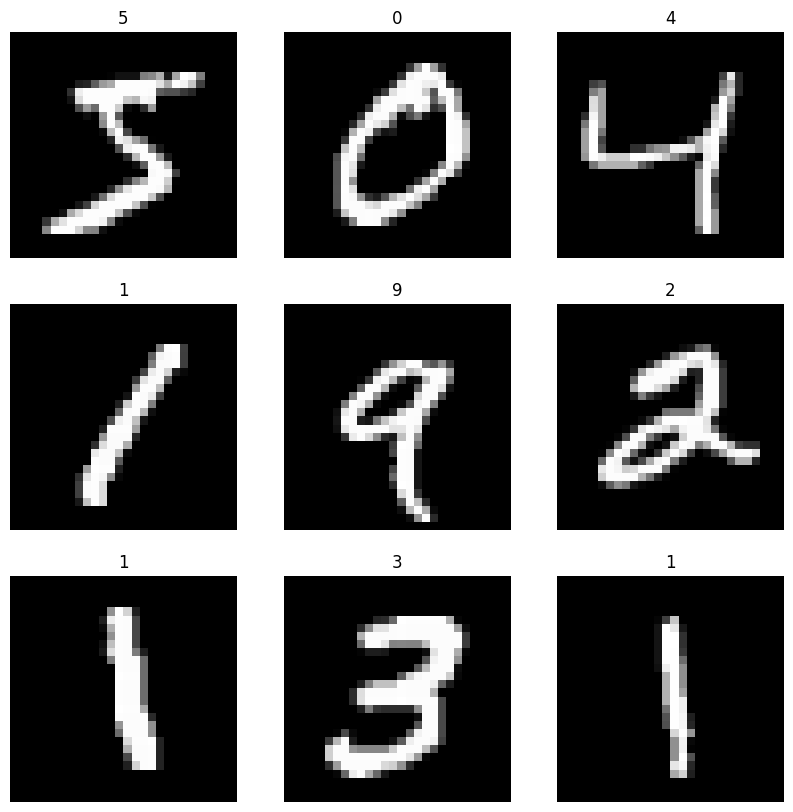

In [31]:
plt.figure(figsize=(10, 10)) 
for i in range(10):
    if i < 9:
        plt.subplot(331 + i)
        img = x_train[i, :, :, 0]
        plt.imshow(img, cmap='gray')
        plt.title(np.argmax(y_train[i]))
    plt.axis('off')

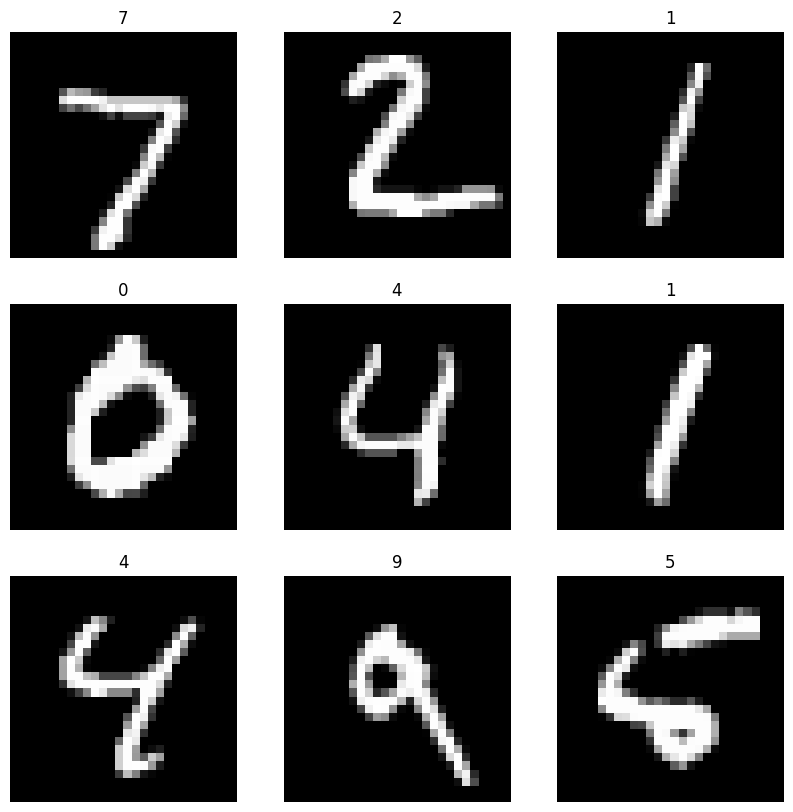

In [32]:
plt.figure(figsize=(10, 10)) 
for i in range(10):
    if i < 9:
        plt.subplot(331 + i)
        img = x_test[i, :, :, 0]
        plt.imshow(img, cmap='gray')
        plt.title(np.argmax(y_test[i]))
    plt.axis('off')

# Define a Model

In this section, we create a simple convolutional neural network. Feel free to play around with the number of layers, their hyperparameters (# of filters, kernels, activations,...) to see, how they affect the model's performance.

In [39]:
num_classes = 10

model_mnist = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(128, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.6),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_mnist.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 64)        73792     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_5 (Dropout)         (None, 1600)             

## Let's train a model

In [40]:
model_mnist.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"])

epochs = 10
history = model_mnist.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2217 - accuracy: 0.9285 - val_loss: 0.0659 - val_accuracy: 0.9798
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0827 - accuracy: 0.9744 - val_loss: 0.0420 - val_accuracy: 0.9877
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0657 - accuracy: 0.9790 - val_loss: 0.0380 - val_accuracy: 0.9893
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0586 - accuracy: 0.9812 - val_loss: 0.0439 - val_accuracy: 0.9865
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0525 - accuracy: 0.9829 - val_loss: 0.0316 - val_accuracy: 0.9900
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0487 - accuracy: 0.9842 - val_loss: 0.0332 - val_accuracy: 0.9892
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0453 - accuracy: 0.9855 - val_loss: 0.0306 - val_accurac

## Plot the training accuracy and

We can plot the values of training and validation losses and accuracies for each epoch. 

This can give us at least a slight idea about the training process - are we overfitting, underfitting, is the training ok? 

As a rule of thumb:

*   if validation and train loss follow ~same curve, the training is okay
*   if the training loss is getting lower, but the validation loss rises, something is wrong and you are overfitting your model on your training data (it won't generalize well on test data) - try a model with less parameters, add dropout layers, introduce data augmentation... 

*   if the validation loss is lower than the training loss, it means you are underfitting and you might improve the model performance if you continue training



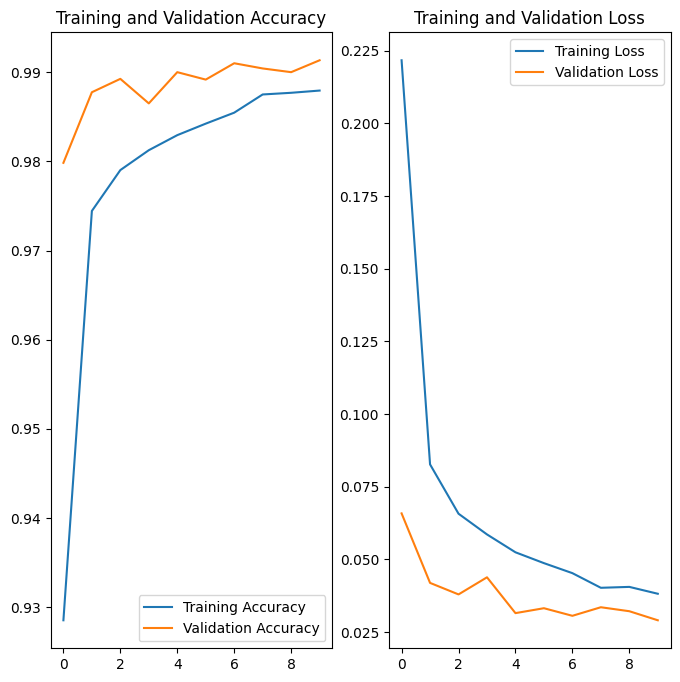

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Print loss and accuracy on test dataset

In [47]:
test_loss, test_acc = model_mnist.evaluate(x_test, y_test)

print("Test accuracy: \t", test_acc)
print("Test loss: \t", test_loss)

313/313 [==============================] - 2s 4ms/step - loss: 0.0208 - accuracy: 0.9933
Test accuracy: 	 0.9933000206947327
Test loss: 	 0.02077956683933735
